<a href="https://colab.research.google.com/github/rfps09/Colab-Backup/blob/main/TemporalSeries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install numpy-hilbert-curve

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for numpy-hilbert-curve: filename=numpy_hilbert_curve-1.0.1-py3-none-any.whl size=6953 sha256=d6d7da75864e7f89d9346cfa3651a18b161ce08174f4cd1089335044920f69a6
  Stored in directory: /root/.cache/pip/wheels/aa/50/aa/cc75da43321e28ebe4cfbb05b51af5048e4615c1d3ea1595c8
Successfully built numpy-hilbert-curve


In [ ]:
from PIL import Image

path = "drive/MyDrive/TensorFlow/DataSets/RandomImages/"

image = Image.open(path+'sad.jpg')
print(f"Original size : {image.size}")

perfil_resized = image.resize((64, 64))
perfil_resized.save(path+'sad_64.jpeg')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.image import imread

from hilbert import decode

path = "drive/MyDrive/TensorFlow/DataSets/RandomImages/"

num_dims = 2

def draw_curve(fig, num_bits):
    #read imagem to color
    img = imread(path+'sad_64.jpeg')
    print(img.shape)

    # The maximum Hilbert integer.
    max_h = 2**(num_bits*num_dims)

    # Generate a sequence of Hilbert integers.
    hilberts = np.arange(max_h)

    # Compute the 2-dimensional locations.
    locs = decode(hilberts, num_dims, num_bits)

    ax = plt.Axes(fig, [0., 0., 1., 1.])
    ax.set_axis_off()

    # Draw. This may be a little slow.
    for ii in range(max_h-1):
        ax.plot([locs[ii,0], locs[ii+1,0]],
        [locs[ii,1], locs[ii+1,1]],
        '-', color = '#%02x%02x%02x' % (img[locs[ii][0]][locs[ii][1]][0], img[locs[ii][0]][locs[ii][1]][1], img[locs[ii][0]][locs[ii][1]][2]))
        ax.set_aspect('equal')

    fig.add_axes(ax)

fig = plt.figure(figsize=(5.12,5.12), dpi=100, facecolor='black')
draw_curve(fig, 6)
plt.savefig(path+'sad_hilbert_64.png', dpi=100)

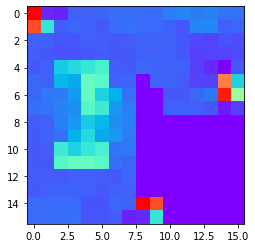

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from hilbert import decode
ecg = np.genfromtxt('drive/MyDrive/TensorFlow/DataSets/HeartBeat/ptbdb_normal.csv',delimiter=',',max_rows=1)
num_bits = 1
max_h = 2**(2*num_bits)
while ecg.size > max_h:
    num_bits+=1
    max_h = 2**(2*num_bits)

ecg = np.hstack((ecg,ecg))
l = decode(range(ecg.size),2,num_bits)
ecg_matriz = np.zeros((2**num_bits,2**num_bits))
for i in range(max_h):
  ecg_matriz[l[i][0]][l[i][1]] = ecg[i]
  print
plt.imshow(ecg_matriz,cmap='rainbow')
plt.show()

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import numpy

def xrange(x):
    return iter(range(x))
def xrange(*args, **kwargs):
        return iter(range(*args, **kwargs))

def processFile2(x,y, level=4,normalize=False):
    n = 1 << level
    m = numpy.zeros((n, n))
    max_arg = 0
    max_uso = abs(max(x))
    #if max_uso<max_arg: max_uso=max_arg
    if max_uso<max_arg:
        max_uso=max_arg
        if max_uso==0: max_uso=0.000000000000001
    if normalize:
        y -= numpy.average(y)
        y /= numpy.std(y)
    for i in xrange(0, len(x)):
        c, r = d2xy(n, int(round((n**2 - 1) * x[i] / max_uso)))
        m[r][c] += y[i]
    return m

########################################
# These functions refactored from those available at 
# wikipedia for Hilbert curves http://en.wikipedia.org/wiki/Hilbert_curve
def d2xy(n, d):
    """
    take a d value in [0, n**2 - 1] and map it to
    an x, y value (e.g. c, r).
    """
    assert(d <= n**2 - 1)
    t = d
    x = y = 0
    s = 1
    while (s < n):
        #rx = 1 & (t / 2)
        #ry = 1 & (t ^ rx)
        rx = 1 & int(t / 2)
        ry = 1 & (int(t) ^ rx)
        x, y = rot(s, x, y, rx, ry)
        x += s * rx
        y += s * ry
        t /= 4
        s *= 2
    return x, y
def rot(n, x, y, rx, ry):
    """
    rotate/flip a quadrant appropriately
    """
    if ry == 0:
        if rx == 1:
            x = n - 1 - x
            y = n - 1 - y
        return y, x
    return x, y

def hilbert_plot(t,x,level=5,
                normalize=True):
    data = processFile2(t,x,
                level,
                normalize)
    return data[ ::-1,:] # reverse row order

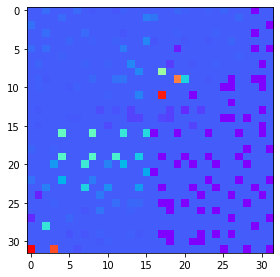

In [ ]:
t_hilbert = np.zeros(shape=188)
for i in range(188):
    if i==0:
        t_hilbert[i]=0
    else:
        t_hilbert[i]=t_hilbert[i-1]+1;
data = hilbert_plot(t_hilbert,ecg)

fig = plt.figure(figsize=(15,14))
ax = fig.add_subplot(2, 3, 1)
# ax.imshow(data, cmap='gray')
ax.imshow(data, cmap='rainbow')